In [3]:
import cvxpy as cvx
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [151]:
A = np.array([[-2, -4], [4, -1]])
x = np.array([1, 1])
traj = [x]
tau = 0.01
for i in range(1000):
    traj.append(traj[-1] + tau * A @ traj[-1])
traj = np.array(traj)

In [152]:
np.linalg.eigvals(A)

array([-1.5+3.96862697j, -1.5-3.96862697j])

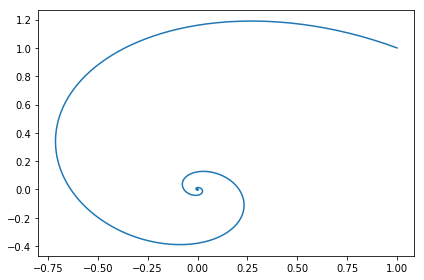

In [166]:
plt.plot(traj[:, 0], traj[:, 1])
plt.tight_layout()
plt.savefig("./trajectory.pdf", format="pdf")

In [163]:
P = cvx.Variable((2, 2), PSD=True)
eps = 1e-1
problem = cvx.Problem(cvx.Minimize(0), [A.T @ P + P @ A << -eps * P, P >> eps * np.eye(2)])
problem.solve(solver="SCS")

0.0

In [164]:
P.value, np.linalg.eigvals(P.value), np.linalg.eigvals(A.T @ P.value + P.value @ A)

(array([[0.21279944, 0.00498653],
        [0.00498653, 0.22003798]]),
 array([0.21025717, 0.22258025]),
 array([-0.81189559, -0.47937813]))

In [129]:
x = cvx.Variable(2)
A0 = np.random.randn(3, 3)
A0 = np.round(A0 + A0.T)
print(np.linalg.eigvals(A0))
print(A0)
A1 = np.random.randn(3, 3)
A1 = np.round(A1 + A1.T)
print(np.linalg.eigvals(A1))
print(A1)
A2 = np.random.randn(3, 3)
A2 = np.round(A2.T + A2)
print(A2)
print(np.linalg.eigvals(A2))
problem = cvx.Problem(cvx.Minimize(cvx.lambda_max(A0 + x[0] * A1 + x[1] * A2)))
problem.solve(solver="SCS", verbose=True)

[ 5.06447888 -1.45710426 -4.60737462]
[[ 1. -1. -3.]
 [-1. -4.  2.]
 [-3.  2.  2.]]
[-5.12071328  1.68078017  2.4399331 ]
[[-0.  1.  3.]
 [ 1.  2. -1.]
 [ 3. -1. -3.]]
[[-3.  1.  0.]
 [ 1.  1. -1.]
 [ 0. -1.  2.]]
[-3.24655136  0.57688752  2.66966384]
----------------------------------------------------------------------------
	SCS v1.2.6 - Splitting Conic Solver
	(c) Brendan O'Donoghue, Stanford University, 2012-2016
----------------------------------------------------------------------------
Lin-sys: sparse-indirect, nnz in A = 31, CG tol ~ 1/iter^(2.00)
eps = 1.00e-04, alpha = 1.50, max_iters = 2500, normalize = 1, scale = 1.00
Variables n = 3, constraints m = 15
Cones:	primal zero / dual free vars: 9
	sd vars: 6, sd blks: 1
Setup time: 1.86e-03s
----------------------------------------------------------------------------
 Iter | pri res | dua res | rel gap | pri obj | dua obj | kap/tau | time (s)
----------------------------------------------------------------------------
     0| 6

0.05478628472305679

In [130]:
x.value

array([0.96166719, 0.33091336])